#Introduction

This project aims to analyze an automotive dataset to understand the factors influencing vehicle prices and to build predictive models for car pricing. This analysis will provide valuable insights for manufacturers, dealers, and buyers, helping them make informed decisions.

As previously we have predicted the price by using Single and Multiple Linear Regression, now we are using Polynomial Regression algorithm to differentiate the accuracy of price prediction base don the features in the dataset.

#Data Preparation

Data preparation, along with data collection and understanding, is one of the most time-consuming phases of a data science project. It involves cleaning the data, handling missing values, transforming variables, and preparing the dataset for modeling.

In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/automobileEDA.csv')

dataset.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [ ]:
import numpy as np

dataset['stroke'].replace(np.nan, dataset['stroke'].mean(), inplace = True)

dataset.dropna(subset = ['horsepower-binned'], axis = 0, inplace = True)
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
dataset.corr(numeric_only = True)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466791,-0.535188,-0.362874,-0.238166,-0.567535,-0.228506,-0.100529,-0.137757,-0.013384,-0.181328,0.094595,0.279269,-0.042343,0.029808,-0.074370,0.079136,-0.198130,0.198130
normalized-losses,0.466791,1.000000,-0.056701,0.019523,0.087919,-0.379444,0.101270,0.119466,-0.029908,0.055473,-0.114745,0.227857,0.239580,-0.227076,-0.183749,0.136857,0.244989,-0.101574,0.101574
wheel-base,-0.535188,-0.056701,1.000000,0.877324,0.819540,0.606754,0.790045,0.595101,0.492272,0.163266,0.249673,0.377636,-0.359959,-0.470169,-0.543893,0.589754,0.480564,0.308418,-0.308418
length,-0.362874,0.019523,0.877324,1.000000,0.856350,0.519878,0.882080,0.695517,0.607411,0.136674,0.158201,0.579175,-0.285708,-0.660987,-0.694374,0.687952,0.654880,0.214703,-0.214703
width,-0.238166,0.087919,0.819540,0.856350,1.000000,0.342910,0.862486,0.727408,0.543823,0.210494,0.188558,0.602482,-0.246193,-0.625728,-0.673340,0.743744,0.662792,0.251353,-0.251353
height,-0.567535,-0.379444,0.606754,0.519878,0.342910,1.000000,0.352288,0.144002,0.193210,-0.081812,0.267926,-0.037302,-0.317816,-0.074819,-0.132738,0.176917,0.044950,0.281833,-0.281833
curb-weight,-0.228506,0.101270,0.790045,0.882080,0.862486,0.352288,1.000000,0.849399,0.646366,0.193454,0.154810,0.748309,-0.281251,-0.744201,-0.790145,0.827789,0.776163,0.229833,-0.229833
engine-size,-0.100529,0.119466,0.595101,0.695517,0.727408,0.144002,0.849399,1.000000,0.589734,0.260706,0.022182,0.803239,-0.266709,-0.649026,-0.678031,0.872281,0.729127,0.083769,-0.083769
bore,-0.137757,-0.029908,0.492272,0.607411,0.543823,0.193210,0.646366,0.589734,1.000000,-0.049606,-0.000045,0.577905,-0.266876,-0.580740,-0.590338,0.544083,0.557465,0.055860,-0.055860
stroke,-0.013384,0.055473,0.163266,0.136674,0.210494,-0.081812,0.193454,0.260706,-0.049606,1.000000,0.191736,0.139086,-0.065752,-0.049819,-0.051449,0.107837,0.063691,0.239974,-0.239974


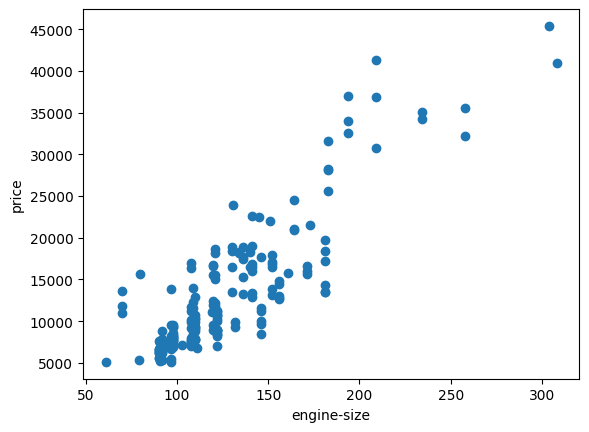

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(dataset['engine-size'], dataset.price)
plt.xlabel('engine-size')
plt.ylabel('price')

plt.show()

(0.0, 50507.81668709988)

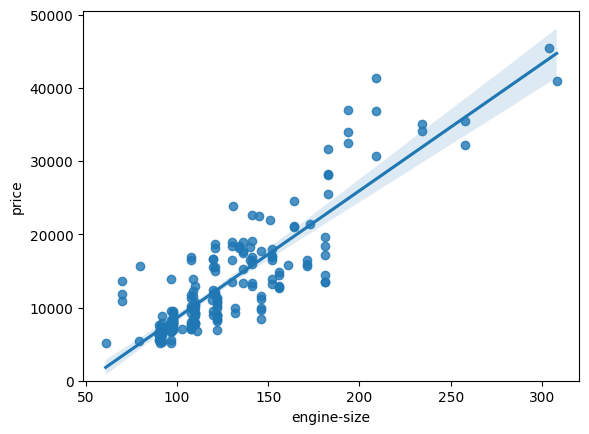

In [ ]:
sns.regplot(x = 'engine-size', y = 'price', data = dataset)

plt.ylim(0,)


In [ ]:
msk = np.random.rand(len(dataset)) <=  0.9

train = dataset[msk]
test = dataset[~msk]

#Modeling
The modeling phase involves selecting and applying suitable regression models, specifically Single Linear Regression and Multiple Linear Regression. These models will help predict car prices based on the features in the dataset.

#Evaluation
The models will be evaluated using performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. These metrics will help assess the accuracy and reliability of the predictive models.

In [ ]:
#train the model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 69.92699437448853
The MSE is: 6082516.169477371
The MAE is: 203220.34502749267
The RMSE is: 2466.275769146137


Text(0, 0.5, 'Price')

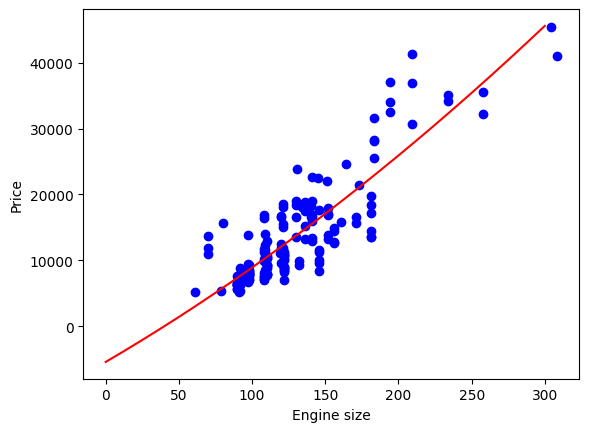

In [ ]:
#curvy line
plt.scatter(train['engine-size'], train.price,  color='blue')
XX = np.arange(0.0, 300.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Price")

In [ ]:
#train the model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['curb-weight']])
train_y = np.asanyarray(train[['price']])

poly1 = PolynomialFeatures(degree = 2)
train_x_poly1 = poly1.fit_transform(train_x)

clf1 = linear_model.LinearRegression()
train_y_ = clf1.fit(train_x_poly1, train_y)

#prediction

test_x = np.asanyarray(test[['curb-weight']])
test_y = np.asanyarray(test[['price']])

test_x_poly1 = poly1.fit_transform(test_x)

test_y_ = clf1.predict(test_x_poly1)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 69.49879161796889
The MSE is: 6169123.7478078855
The MAE is: 172793.71640588206
The RMSE is: 2483.7720804872347


Text(0, 0.5, 'Price')

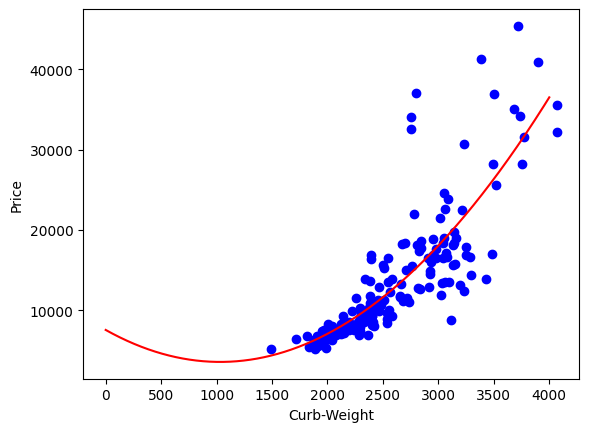

In [ ]:
#curvy line
plt.scatter(train['curb-weight'], train.price,  color='blue')
XX = np.arange(0.0, 4000.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX+ clf1.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Curb-Weight")
plt.ylabel("Price")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['highway-mpg']])
train_y = np.asanyarray(train[['price']])

poly2 = PolynomialFeatures(degree = 2)
train_x_poly2 = poly2.fit_transform(train_x)

clf2 = linear_model.LinearRegression()
train_y_ = clf2.fit(train_x_poly2, train_y)

#prediction

test_x = np.asanyarray(test[['highway-mpg']])
test_y = np.asanyarray(test[['price']])

test_x_poly2 = poly2.fit_transform(test_x)

test_y_ = clf2.predict(test_x_poly2)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 21.600362436971608
The MSE is: 15856980.47932232
The MAE is: 311064.7809580951
The RMSE is: 3982.0824300009563


Text(0, 0.5, 'Price')

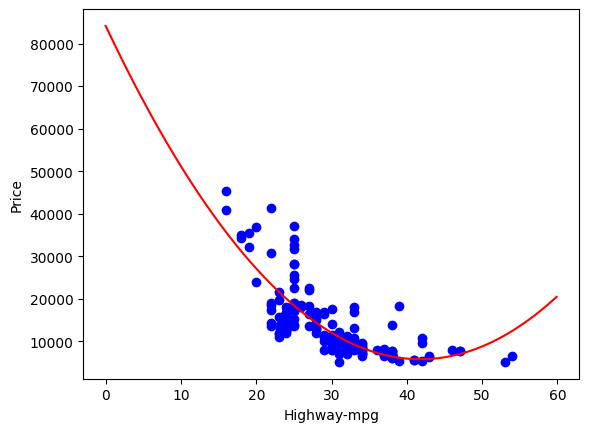

In [ ]:
#curvy line
plt.scatter(train['highway-mpg'], train.price,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['highway-mpg', 'engine-size']])
train_y = np.asanyarray(train[['price']])

poly5 = PolynomialFeatures(degree = 5)
train_x_poly5 = poly5.fit_transform(train_x)

clf5 = linear_model.LinearRegression()
train_y_ = clf5.fit(train_x_poly5, train_y)

#prediction

test_x = np.asanyarray(test[['highway-mpg', 'engine-size']])
test_y = np.asanyarray(test[['price']])

test_x_poly5 = poly5.fit_transform(test_x)

test_y_ = clf5.predict(test_x_poly5)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 score is:', r2_score(test_y, test_y_)*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))
print('The MAE is:', (np.mean(np.absolute(test_y_ - test_y)))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 score is: 73.52220815987988
The MSE is: 5355354.200544679
The MAE is: 191830.49913443002
The RMSE is: 2314.1638231863963


Text(0, 0.5, 'Price')

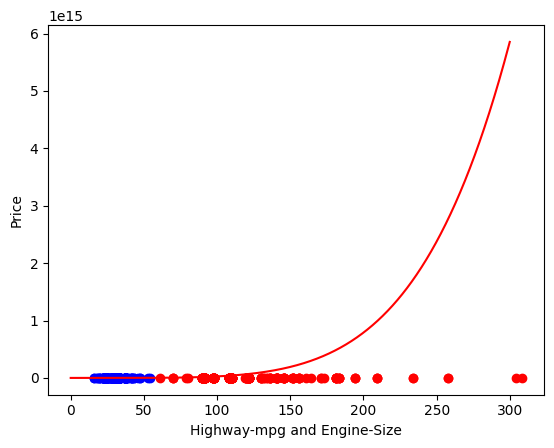

In [ ]:
#curvy line
plt.scatter(train['highway-mpg'], train.price,  color='blue')
plt.scatter(train['engine-size'], train.price,  color='red')

XX = np.arange(0.0, 300.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX+ clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4) + clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("Highway-mpg and Engine-Size")
plt.ylabel("Price")

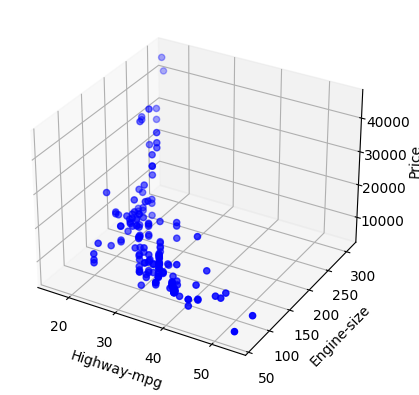

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['highway-mpg'], train['engine-size'], train['price'], c='blue')

# (Calculate points for the regression plane here - this would require some additional calculations)


ax.set_xlabel('Highway-mpg')
ax.set_ylabel('Engine-size')
ax.set_zlabel('Price')
plt.show()